In [1]:
import pickle
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from matplotlib.ticker import MultipleLocator

In [2]:
datasets = ['2C9', '2D6', '3A4', '3cl', 'bace', 'bbbp', 'bioavailability', 
            'carcinogens', 'clintox', 'DILI', 'hERG', 'HIA', 'pgp', 'skin']
teachers = ['RF', 'LOG', 'NB']
students = ['RF', 'LOG', 'NB']

In [6]:
def create_dataframe(feature, teacher, student, dataset, metric, index):
    
    filename = 'results/' + feature + '/' + dataset + '_results'
    infile = open(filename,'rb')
    new_dict = pickle.load(infile)
    infile.close()
    
    # Initialization
    teacher_active_values = []
    student_active_values = []
    teacher_passive_values = []
    student_passive_values = []
    teacher_y_student_values = []
    
    for i in range(10):
        k = index * 10 + i
        # Obtain AUC
        teacher_active_values.append(np.sum(new_dict[teacher][teacher][k][metric]))
        teacher_passive_values.append(np.sum(new_dict['PASSIVE'][teacher][k][metric]))   
        student_active_values.append(np.sum(new_dict[student][student][k][metric]))
        student_passive_values.append(np.sum(new_dict['PASSIVE'][student][k][metric]))   
        teacher_y_student_values.append(np.sum(new_dict[teacher][student][k][metric]))
    
        size = len(new_dict[teacher][teacher][k][metric])
       
    return [student_active_values, student_passive_values,teacher_y_student_values, size]

# Teacher model: Logistic regression

In [7]:
def create_df(index):
    
    dataset_list = []
    data = []
    labels = []

    metric = 'mccs_auc'
    teacher = 'LOG'
    feature = 'circular_fingerprint'

    for dataset in datasets:
        log_temp = create_dataframe(feature, teacher, 'LOG', dataset, metric, index)
        nb_temp = create_dataframe(feature, teacher, 'NB', dataset, metric, index)
        rf_temp = create_dataframe(feature, teacher, 'RF', dataset, metric,  index)

        rf_active = rf_temp[0]
        log_active = log_temp[0]
        nb_active = nb_temp[0]
        log_y_rf = rf_temp[2]
        log_y_nb = nb_temp[2]

        size = rf_temp[3]

        for i in range(len(rf_active)):
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)       

            data.append(log_active[i]/size)
            data.append(rf_active[i]/size)
            data.append(nb_active[i]/size)
            data.append(log_y_rf[i]/size)
            data.append(log_y_nb[i]/size)

            labels.append('LOG Active')
            labels.append('RF Active')
            labels.append('NB Active')
            labels.append('LOG Yoked RF')
            labels.append('LOG Yoked NB')

    return [dataset_list, data, labels]

700


/Users/lizhixiong/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

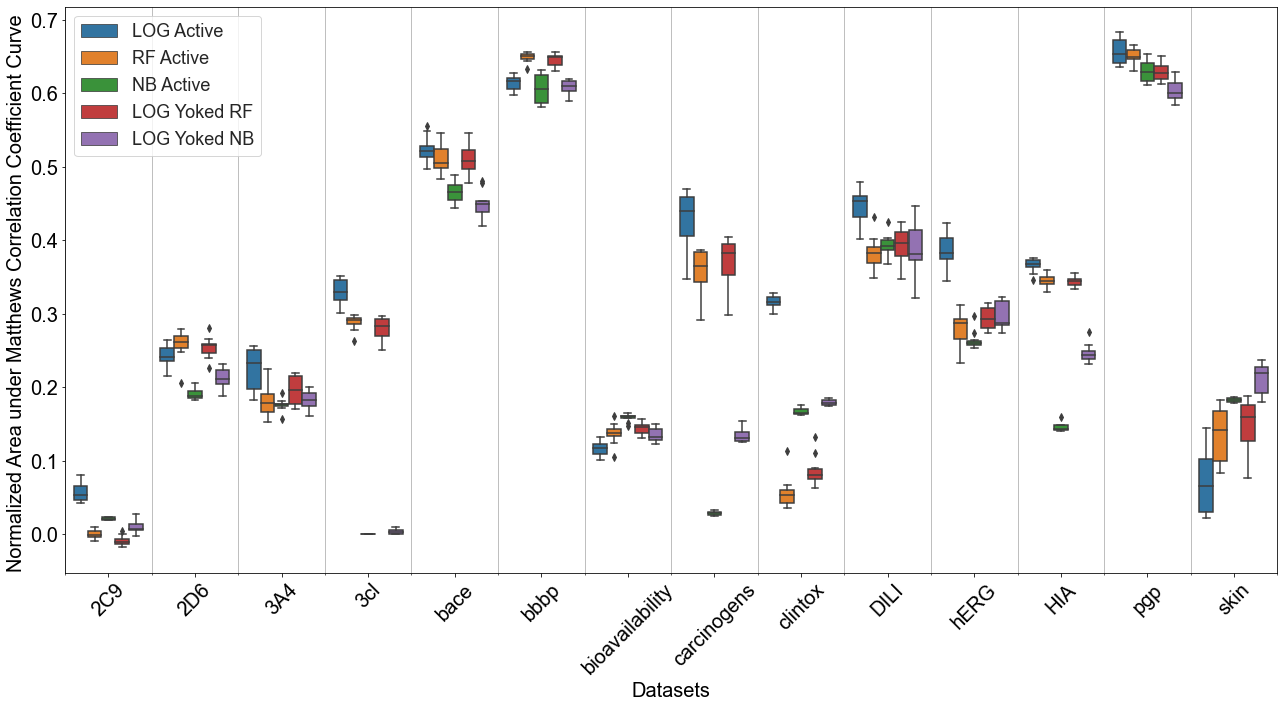

In [8]:
i = 9
plt.figure(i)
results = create_df(i)
data_df_ECFP = {'Datasets': results[0],
             'Data': results[1],
             'labels': results[2]}
df_ECFP_RF = pd.DataFrame(data_df_ECFP)
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(df_ECFP_RF['Datasets'], df_ECFP_RF['Data'], hue=df_ECFP_RF['labels'])
sns.set(style="white")
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='grey', lw=0.5)
ax.legend(loc='upper left', fontsize = 18)

#ax.set_title('Logistic Regression as the teacher for Circular Fingerprint', fontsize = 15, loc='center')
ax.set_xlabel('Datasets', fontsize = 20)
ax.set_ylabel('Normalized Area under Matthews Correlation Coefficient Curve ', fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20, labelrotation=45)
ax.yaxis.tick_left() # where the y axis marks will be
figure_name = 'LOG_ECFP_boxplot' + '_' + str(i) + '.pdf'
plt.tight_layout()
#plt.savefig(figure_name)

# Teacher Model: Random Forest

In [9]:
def create_df(index):
    dataset_list = []
    data = []
    labels = []

    metric = 'mccs_auc'
    teacher = 'RF'
    feature = 'circular_fingerprint'

    for dataset in datasets:
        log_temp = create_dataframe(feature, teacher, 'LOG', dataset, metric, index)
        nb_temp = create_dataframe(feature, teacher, 'NB', dataset, metric, index)
        rf_temp = create_dataframe(feature, teacher, 'RF', dataset, metric, index)

        rf_active = rf_temp[0]
        log_active = log_temp[0]
        nb_active = nb_temp[0]
        rf_y_log = log_temp[2]
        rf_y_nb = nb_temp[2]
        size = rf_temp[3]

        for i in range(len(rf_active)):
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)       

            data.append(rf_active[i]/size)
            data.append(log_active[i]/size)
            data.append(nb_active[i]/size)
            data.append(rf_y_log[i]/size)
            data.append(rf_y_nb[i]/size)

            labels.append('RF_active')
            labels.append('LOG_active')
            labels.append('NB_active')
            labels.append('RF_yoked_LOG')
            labels.append('RF_yoked_NB')
                
    return [dataset_list, data, labels]

/Users/lizhixiong/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

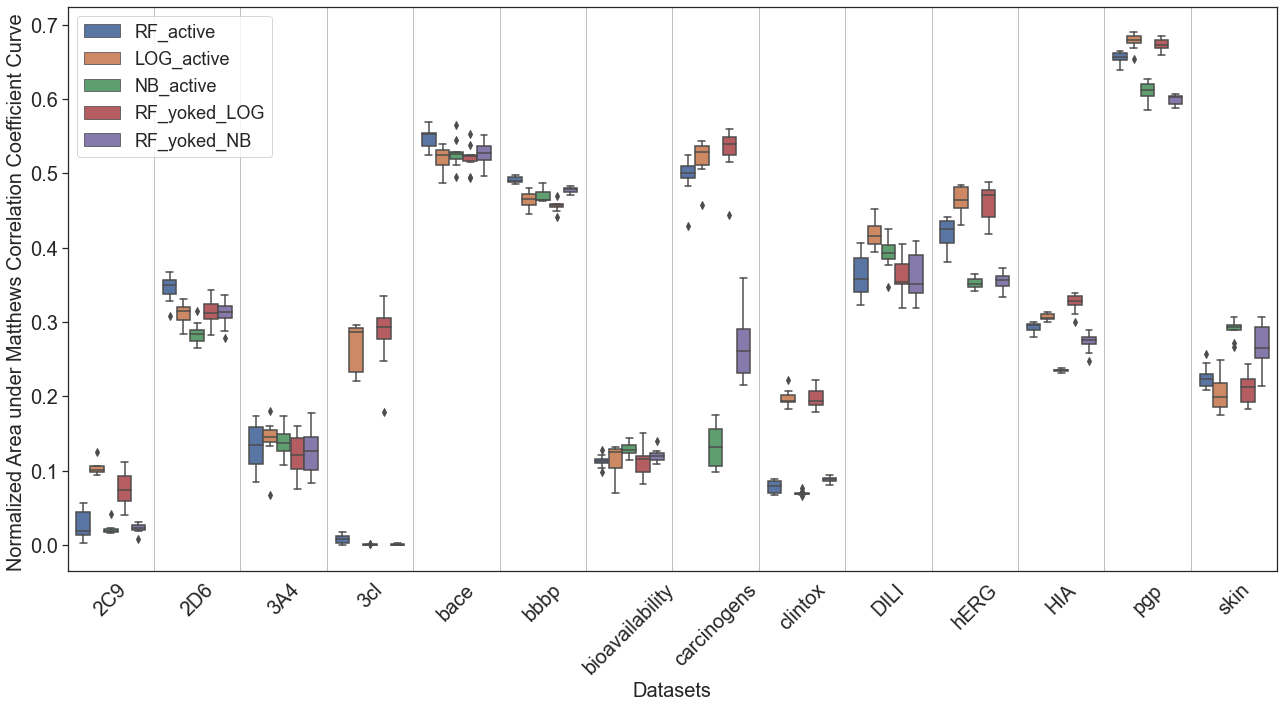

In [10]:
i = 1
plt.figure(i)
results = create_df(i)
data_df_ECFP = {'Datasets': results[0],
             'Data': results[1],
             'labels': results[2]}
df_ECFP_RF = pd.DataFrame(data_df_ECFP)
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(df_ECFP_RF['Datasets'], df_ECFP_RF['Data'], hue=df_ECFP_RF['labels'])
sns.set(style="white")
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='grey', lw=0.5)
ax.legend(loc='upper left', fontsize = 18)

#ax.set_title('Logistic Regression as the teacher for Circular Fingerprint', fontsize = 15, loc='center')
ax.set_xlabel('Datasets', fontsize = 20)
ax.set_ylabel('Normalized Area under Matthews Correlation Coefficient Curve ', fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20, labelrotation=45)
ax.yaxis.tick_left() # where the y axis marks will be
#figure_name = 'LOG_ECFP_boxplot' + '_' + str(i) + '.jpg'
figure_name = 'RF_ECFP_boxplot' + '_' + str(i) + '.pdf'
plt.tight_layout()
#plt.savefig(figure_name)

# Teacher Model: Naive Bayes

In [11]:
# data frame for boxplot or violinplot, MACCS RF
def create_df(index):
    dataset_list = []
    data = []
    labels = []

    metric = 'mccs_auc'
    teacher = 'NB'
    feature = 'circular_fingerprint'

    for dataset in datasets:
        log_temp = create_dataframe(feature, teacher, 'LOG', dataset, metric, index)
        nb_temp = create_dataframe(feature, teacher, 'NB', dataset, metric, index)
        rf_temp = create_dataframe(feature, teacher, 'RF', dataset, metric, index)

        rf_active = rf_temp[0]
        log_active = log_temp[0]
        nb_active = nb_temp[0]
        nb_y_rf = rf_temp[2]
        nb_y_log = log_temp[2]
        size = rf_temp[3]

        for i in range(len(rf_active)):
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)
            dataset_list.append(dataset)

            data.append(nb_active[i]/size)
            data.append(rf_active[i]/size)
            data.append(nb_y_rf[i]/size)
            data.append(log_active[i]/size)
            data.append(nb_y_log[i]/size)

            labels.append('NB_active')
            labels.append('RF_active')
            labels.append('NB_yoked_RF')
            labels.append('LOG_active')
            labels.append('NB_yoked_LOG')
                
    return [dataset_list, data, labels]

/Users/lizhixiong/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

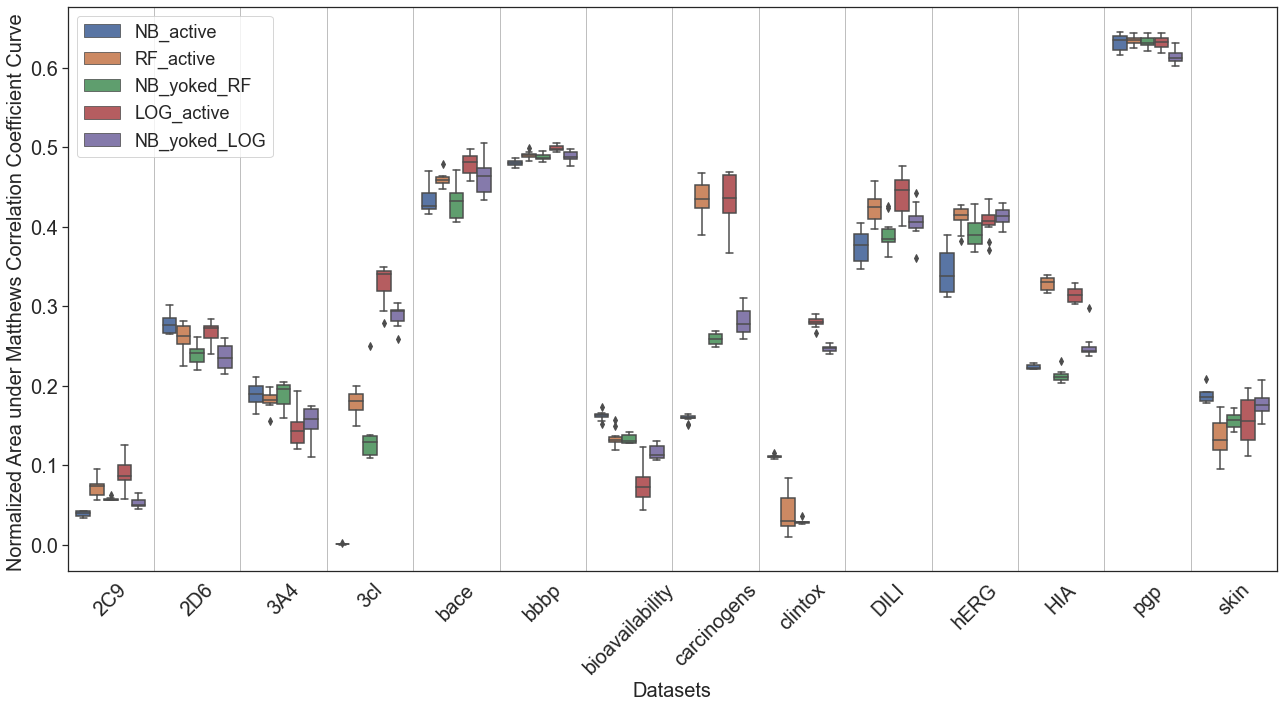

In [12]:
i = 0
plt.figure(i)
results = create_df(i)
data_df_ECFP = {'Datasets': results[0],
             'Data': results[1],
             'labels': results[2]}
df_ECFP_RF = pd.DataFrame(data_df_ECFP)
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(df_ECFP_RF['Datasets'], df_ECFP_RF['Data'], hue=df_ECFP_RF['labels'])
sns.set(style="white")
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.grid(True, which='minor', color='grey', lw=0.5)
ax.legend(loc='upper left', fontsize = 18)

#ax.set_title('Logistic Regression as the teacher for Circular Fingerprint', fontsize = 15, loc='center')
ax.set_xlabel('Datasets', fontsize = 20)
ax.set_ylabel('Normalized Area under Matthews Correlation Coefficient Curve ', fontsize = 20)
plt.tick_params(axis='y', which='major', labelsize=20)
plt.tick_params(axis='x', which='major', labelsize=20, labelrotation=45)
ax.yaxis.tick_left() # where the y axis marks will be
figure_name = 'NB_ECFP_boxplot' + '_' + str(i) + '.pdf'
plt.tight_layout()
#plt.savefig(figure_name)